In [1]:
import os
import pandas as pd
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
IMAGES_PATH = 'img/'

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
T = pd.read_csv('series/'+'obs_h'+'.csv',header=0,index_col=0,parse_dates=True)

TQ_bool = T.resample('M').count()>2
nstation = len(TQ_bool.columns)
TQ_bool_sum = TQ_bool.sum().sort_values(ascending=False)
TQ_bool = TQ_bool[TQ_bool_sum.index]
TQ = TQ_bool*np.arange(nstation)
TQ[~TQ_bool] = np.nan

In [3]:
TQ_bool_sum.head()

Absecon_Creek__Rte_30_at_Absecon_NJ           119
Rockaway_Inlet_near_Floyd_Bennett_Field_NY    119
Barnegat_Bay_at_Barnegat_Light_NJ             119
Barnegat_Bay_at_Mantoloking_NJ                119
East_Rockaway_Inlet_at_Atlantic_Beach_NY      119
dtype: int64

In [4]:
station = 'Rockaway_Inlet_near_Floyd_Bennett_Field_NY'
x_len = 24
y_len = 6
period = x_len+y_len
dir0 = 'tests/{:s}_{:d}_{:d}'.format(station,x_len,y_len)

In [5]:
T = T[station]

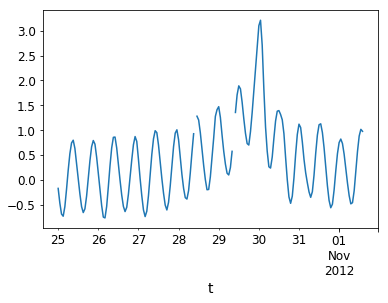

In [6]:
T['2012-10-25':'2012-11-02'].plot();

In [7]:
T_cont = T.dropna(how='any').to_frame()

In [8]:
T_cont['tdiff'] = np.zeros(len(T_cont))
T_cont.loc[1:,'tdiff'] = (T_cont.index[1:]-T_cont.index[:-1])/pd.Timedelta('1H')

In [9]:
T_cont['isSample'] = T_cont['tdiff'].rolling(period-1).sum()==(period-1)

In [10]:
T_cont[T_cont['tdiff']>1].head(10)

,Rockaway_Inlet_near_Floyd_Bennett_Field_NY,tdiff,isSample
t,,,
2007-03-08 21:00:00,-1.167404,17.0,False
2007-03-11 08:00:00,-0.293542,2.0,False
2007-04-08 09:00:00,-0.753790,2.0,False
2007-04-13 14:00:00,-0.925088,2.0,False
2007-06-21 05:00:00,0.657129,2.0,False
2007-08-01 20:00:00,-0.820542,2.0,False
2007-08-14 16:00:00,0.088067,2.0,False
2007-09-16 16:00:00,0.591597,3.0,False
2007-11-04 11:00:00,-0.003982,2.0,False


In [11]:
T_cont['2007-03-07 20:00:00':'2007-03-10 23:00:00']

,Rockaway_Inlet_near_Floyd_Bennett_Field_NY,tdiff,isSample
t,,,
2007-03-07 20:00:00,-0.939414,1.0,True
2007-03-07 21:00:00,-0.905886,1.0,True
2007-03-07 22:00:00,-0.648025,1.0,True
2007-03-07 23:00:00,-0.257271,1.0,True
2007-03-08 00:00:00,0.107879,1.0,True
2007-03-08 01:00:00,0.373360,1.0,True
2007-03-08 02:00:00,0.469982,1.0,True
2007-03-08 03:00:00,0.407193,1.0,True
2007-03-08 04:00:00,0.273284,1.0,True


In [12]:
T_cont['month'] = T_cont.index.month
T_avail = T_cont[T_cont['isSample']]

In [13]:
T_avail.head()

,Rockaway_Inlet_near_Floyd_Bennett_Field_NY,tdiff,isSample,month
t,,,,
2007-03-05 10:00:00,-0.305430,1.0,True,3
2007-03-05 11:00:00,0.090810,1.0,True,3
2007-03-05 12:00:00,0.396220,1.0,True,3
2007-03-05 13:00:00,0.523931,1.0,True,3
2007-03-05 14:00:00,0.420299,1.0,True,3


Saving figure 022_data_split_single
Period =  30
Available periods =  65452


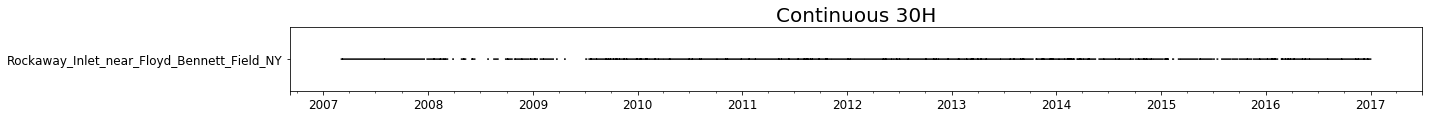

In [14]:
TQ_bool = T_avail.iloc[:,:-3].resample('D').count()>2
nstation = len(TQ_bool.columns)
TQ_bool_sum = TQ_bool.sum().sort_values(ascending=False)
TQ_bool = TQ_bool[TQ_bool_sum.index]
TQ = TQ_bool*np.arange(nstation)
TQ[~TQ_bool] = np.nan

ax = TQ.plot(legend=False,figsize=(20,2),yticks=range(nstation),color='k')
ax.set_yticklabels(list(TQ_bool_sum.index.values));
ax.set_xlabel(' ');
ax.set_title('Continuous 30H',fontsize=20);
save_fig("022_data_split_single");

print("Period = ", period)
print("Available periods = ", len(T_avail))

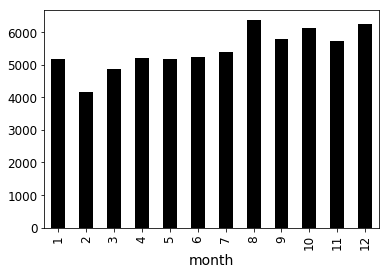

In [15]:
T_avail.groupby('month').count().iloc[:,0].plot('bar',color='k');

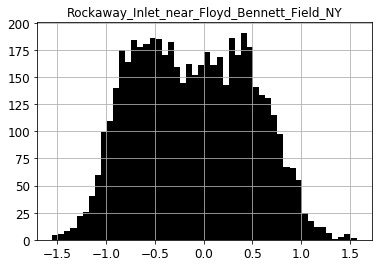

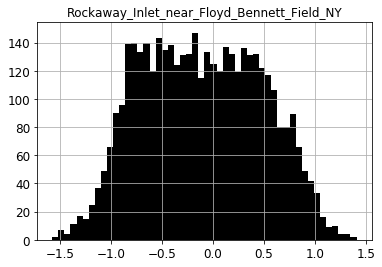

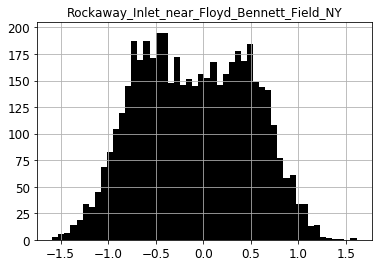

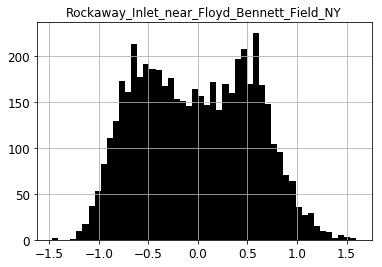

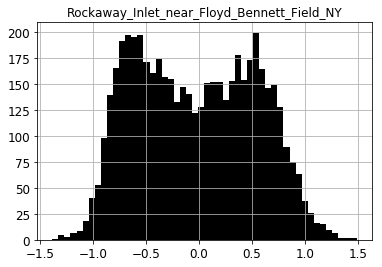

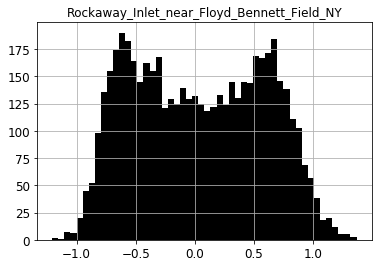

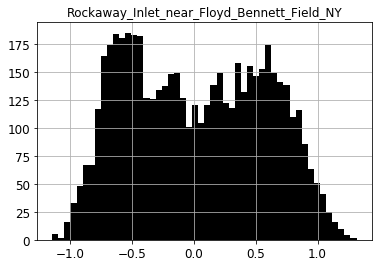

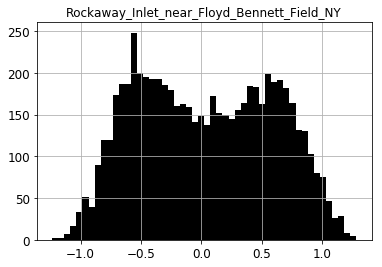

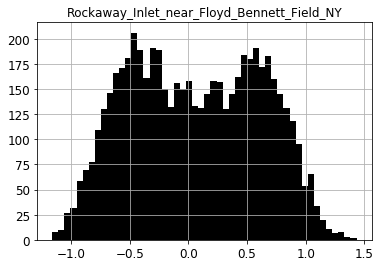

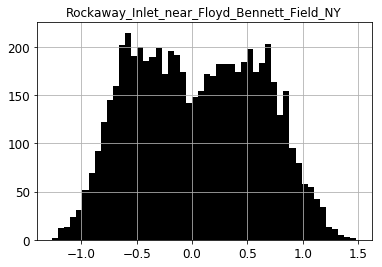

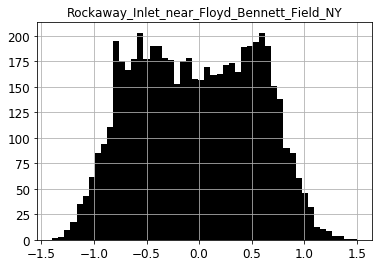

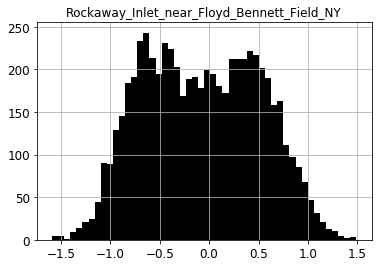

In [16]:
T_avail.iloc[:,[0,-1]].groupby('month').hist(bins=50,color='k');

In [17]:
T = T_cont

In [18]:
T['i'] = np.arange(len(T)).astype(int)
T['t'] = T.index
T.set_index('i', inplace=True)

In [19]:
ids = T.index[T.isSample]
cat = T.month[T.isSample].values
D = T[station]

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

In [21]:
split = StratifiedShuffleSplit(n_splits=1, test_size=.1, random_state=8)
for train_index, test_index in split.split(ids, cat):
    id_train = ids[train_index].values
    id_test = ids[test_index].values
    print(len(train_index),len(test_index))

58906 6546


In [22]:
data_train = np.array([D[v-29:v+1].values for v in id_train])
data_test = np.array([D[v-29:v+1].values for v in id_test])
print(data_train.shape, data_test.shape)

(58906, 30) (6546, 30)


In [23]:
X_train = data_train[:,:x_len]
Y_train = data_train[:,x_len:]
X_test = data_test[:,:x_len]
Y_test = data_test[:,x_len:]
print('X_train: ', X_train.shape)
print('Y_train: ', Y_train.shape)
print('X_test: ', X_test.shape)
print('Y_test: ', Y_test.shape)

X_train:  (58906, 24)
Y_train:  (58906, 6)
X_test:  (6546, 24)
Y_test:  (6546, 6)


In [24]:
if not os.path.exists(dir0):
    os.makedirs(dir0)

In [25]:
np.savez(dir0+'/data', X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test)